In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-0.09729819,  4.68320803],
       [ 7.862985  , -4.94446798],
       [-5.44374335,  1.14150965],
       ...,
       [ 0.23587838,  4.64442664],
       [ 2.10830069,  4.59077068],
       [-2.75281689,  1.29479744]])

In [4]:
y

array([0, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1,
       2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 2,
       1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1,
       2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2,

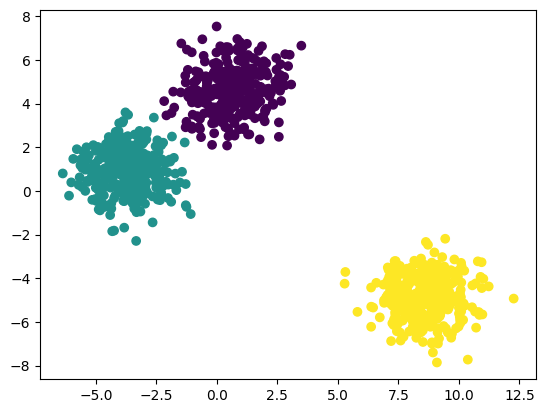

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## Standardization -feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0000000000005,
 235.4212608423249,
 64.4611801526815,
 56.9483374140925,
 48.43219758767841,
 39.13384263398375,
 34.74296649312615,
 33.20669298129605,
 27.99823904302253,
 25.755895012002192]

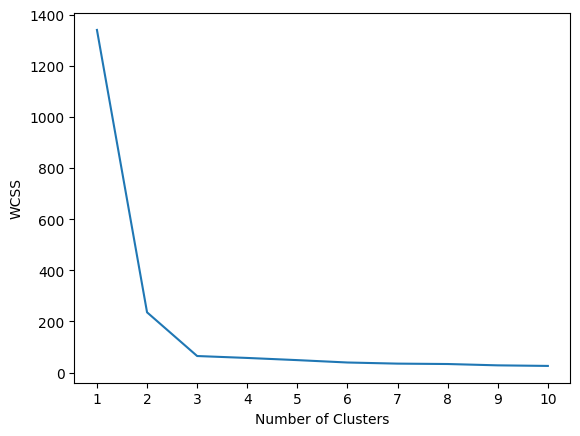

In [13]:
## Plot elblow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1,
       2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0,
       0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0,
       0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2,
       0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0,
       2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1,
       2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([2, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0,
       2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0,
       0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0,
       2, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2,
       2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2,
       0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1,
       0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0,

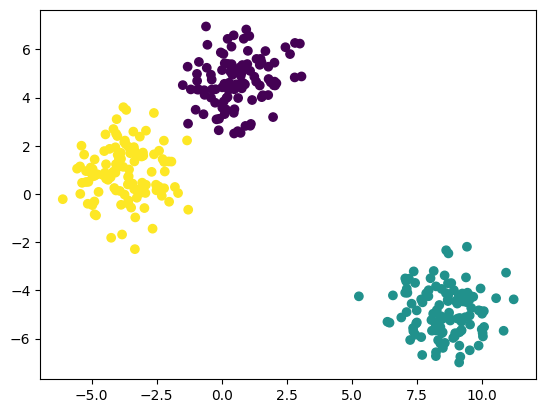

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

### Validating K Value

#### Knee Locator

In [19]:
from kneed import KneeLocator

In [20]:
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [21]:
k1.elbow

np.int64(3)

#### SilHoutee Score

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients

[np.float64(0.7551598604251589),
 np.float64(0.7420209159558024),
 np.float64(0.5720981815662118),
 np.float64(0.4471106527823062),
 np.float64(0.3473919351141046),
 np.float64(0.34287365113627266),
 np.float64(0.32017108760079227),
 np.float64(0.33605303288687866),
 np.float64(0.3336589541405032)]

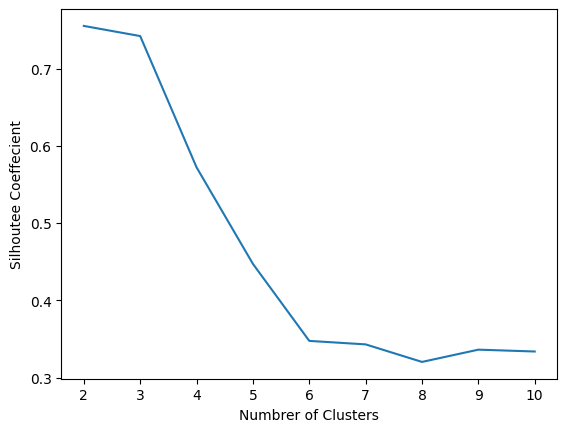

In [25]:
### Plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Numbrer of Clusters")
plt.ylabel("Silhoutee Coeffecient")
plt.show()